##**importing libraries**

We import following Libraries :


**1.Pandas :** data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL

**2.Matplotlib** this is used for the plot the graph 

**3.Sklearn.naive_bayes :** to apply naive bayes 

**4.Sklearn.linear_model :** to apply the Logistic regression

**5.Sklearn.metrics :** for the check the Recall, precision, f1-score and accuracy of the model 





In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**Load Dataset**

First,we upload the dataset by using **read_csv()** function in pandas library

In [85]:
data = pd.read_csv('/content/drive/MyDrive/data.csv')

First, lets us see the whole data how data is displaying

In [86]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN





Using  **iloc()** function in python, we easily retrieve any particular value from a row and/or column using index values in the dataset.

In [87]:
data.iloc[0,4]

122.8

In [88]:
data.iloc[0,:]

id                           842302
diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                    1001.0
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                   2019.0
smoothness_worst             0.1622
compactness_worst           

In [89]:
data.iloc[:,4] 

0      122.80
1      132.90
2      130.00
3       77.58
4      135.10
        ...  
564    142.00
565    131.20
566    108.30
567    140.10
568     47.92
Name: perimeter_mean, Length: 569, dtype: float64

In [90]:
data.iloc[4:567,:] 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,...,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.11270,0.07400,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.1645,0.09366,0.05985,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.1932,0.18590,0.09353,...,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.2087,0.25500,0.09429,...,42.79,128.7,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,...,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,...,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.14400,0.09791,...,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN


**shape()** Return a tuple representing the dimensionality of the DataFrame and the size of the dataset

In [91]:
data.shape

(569, 33)

**Now we find length or size of training data and testing data**

**For Training Data =** ratio will be 70% to 80% of original dataset

**For Testing Data =** ratio will be 30% to 20% of original dataset

In [92]:
training_data_len = int(0.7*len(data))   
testing_data_len = int(0.3*len(data))    


In [93]:
training_data_len

398

In [94]:
testing_data_len

170

Below, Code show data of column **id** and **diagnosis**

In [95]:
data[["id","diagnosis"]]

,id,diagnosis
0,842302,M
1,842517,M
2,84300903,M
3,84348301,M
4,84358402,M
...,...,...
564,926424,M
565,926682,M
566,926954,M
567,927241,M


In [96]:
data["diagnosis"]=='B'   

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool

In [97]:
data[data["diagnosis"]=='B']     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,NaN
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,NaN
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,NaN
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,NaN


store the data where diagnosis is B i.e negative in ***neg_class_data***

store the data where diagnosis is M i.e positive in ***pos_class_data***

In [98]:
neg_class_data = data[data["diagnosis"]=='B']
pos_class_data = data[data["diagnosis"]=='M']

In [99]:
neg_class_data.shape

(357, 33)

In [100]:
pos_class_data.shape 

(212, 33)

Now, We doing slicing of data. 

We need,
1. training data size 398
2. testing data size 170

In training data , there should be equal number of ***Malignant*** and ***Benign*** data.

 For this, we take 199 data of ***Malignant*** and 199 data of ***Benign***

In [101]:
train_neg_class_data = neg_class_data.iloc[0:training_data_len//2,:] 
train_pos_class_data = pos_class_data.iloc[0:training_data_len//2,:]  

test_neg_class_data = neg_class_data.iloc[training_data_len//2:,:]   
test_pos_class_data = pos_class_data.iloc[training_data_len//2:,:]   

In [102]:
train_neg_class_data.shape  

(199, 33)

In [103]:
train_pos_class_data.shape 

(199, 33)

In [104]:
test_neg_class_data.shape

(158, 33)

In [105]:
test_pos_class_data.shape

(13, 33)

Now, We combine train_neg_class_data and train_pos_class_data to make our training data using ***concat()***

Before combine two list we have make sure ***in which way we want to join or combine two list whether horizontally or vertically***

For this we need to assign value of axis.
0 --> for vertical joining
1 --> for horizontal joining

By default value of axis is 0

In [106]:
training_data = pd.concat([train_neg_class_data,train_pos_class_data])

In [107]:
training_data.shape

(398, 33)

In [108]:
training_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,...,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999,NaN
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830,NaN
503,915143,M,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.100300,...,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277,NaN
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670,NaN


Now, we do same procedure as we done above code for ***testing data***

In [109]:
testing_data = pd.concat([test_neg_class_data,test_pos_class_data])

In [110]:
testing_data.shape

(171, 33)

### Before moving further, We have to make sure there should be no cell that have value NaN (Not a Number)
 It is very essential to deal with NaN in order to get the desired results.

 In our dataset, last column i.e. 32th columns 'Unnamed: 32' have NaN values. So,We have to remove them

In [111]:
training_data.columns[32]

'Unnamed: 32'

In [112]:
training_data.drop(["Unnamed: 32"],axis=1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,...,23.860,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
503,915143,M,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.100300,...,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,17.110,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670


In [113]:
print(training_data) 

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
37     854941         B       13.030         18.42           82.61      523.8   
46   85713702         B        8.196         16.84           51.71      201.9   
..        ...       ...          ...           ...             ...        ...   
499     91485         M       20.590         21.24          137.80     1320.0   
501     91504         M       13.820         24.49           92.33      595.9   
503    915143         M       23.090         19.83          152.10     1682.0   
509    915460         M       15.460         23.95          103.80      731.3   
512    915691         M       13.400         20.52           88.64      556.7   

     smoothness_mean  compa

As you can see above output, changes didn't update training_data. For this, we use ***inplace***. By this we can update the training_data without copying values into variable

In [114]:
training_data.drop(["Unnamed: 32"],axis=1,inplace=True) 

In [115]:
training_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,...,23.860,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
503,915143,M,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.100300,...,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
509,915460,M,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,17.110,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670


## Now , Lets use Matplotlib library functions to draw some graphs

In [116]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Now, We plot **scatter graph** for any two columns

We create scatter plot for **'radius_mean', 'texture_mean'**

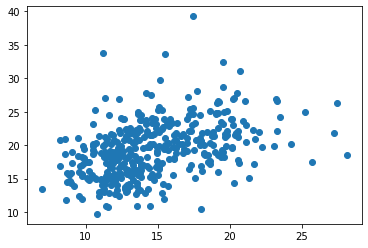

In [117]:
plt.scatter(training_data[data.columns[2]],training_data[data.columns[3]])   # display scatter plot graph , x - axis = radius_mean , y axis = texture_mean

## **Correlation**


*   Correlation tell you the relationship between two columns of dataset
*   **r** knowns as pearson correlation coefficient

**corr()** is used to find the pairwise correlation of all columns in the Pandas. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

**Features of Pearsons correlation matrix**

*   Shape ---> Total Number of columns x  Total Number of columns
*   Sqare matrix (always)
*   Matrix will be symmetrices 
*   Diagonal value will be 1 (always)









In [118]:
training_data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.090787,0.167022,0.091058,0.120059,0.033500,0.034490,0.078780,0.068188,0.016826,...,0.099812,0.117864,0.100667,0.131310,0.028039,0.015930,0.044710,0.051267,-0.048499,0.000955
radius_mean,0.090787,1.000000,0.423461,0.997694,0.987369,0.163584,0.503963,0.666143,0.819427,0.138864,...,0.965959,0.379369,0.962388,0.938114,0.133019,0.399732,0.512911,0.733373,0.142004,0.007183
texture_mean,0.167022,0.423461,1.000000,0.430737,0.406719,0.075724,0.332135,0.374872,0.389672,0.126142,...,0.453145,0.905372,0.456969,0.429743,0.188699,0.360214,0.380656,0.408845,0.170121,0.186314
perimeter_mean,0.091058,0.997694,0.430737,1.000000,0.986057,0.203135,0.556726,0.707207,0.849163,0.176434,...,0.965354,0.386399,0.967227,0.937632,0.164292,0.442629,0.550522,0.760646,0.167662,0.051014
area_mean,0.120059,0.987369,0.406719,0.986057,1.000000,0.167526,0.489072,0.670129,0.813356,0.132800,...,0.956464,0.355407,0.953579,0.953814,0.127434,0.370314,0.493947,0.704323,0.112782,-0.005618
smoothness_mean,0.033500,0.163584,0.075724,0.203135,0.167526,1.000000,0.658811,0.557233,0.566670,0.555629,...,0.206653,0.130719,0.236436,0.196102,0.787594,0.504358,0.476919,0.510499,0.398470,0.521051
compactness_mean,0.034490,0.503963,0.332135,0.556726,0.489072,0.658811,1.000000,0.890881,0.835291,0.616996,...,0.530167,0.333853,0.584806,0.496415,0.555464,0.868557,0.823540,0.815929,0.517360,0.681613
concavity_mean,0.078780,0.666143,0.374872,0.707207,0.670129,0.557233,0.890881,1.000000,0.919576,0.512700,...,0.670765,0.357934,0.711359,0.652521,0.466058,0.742074,0.879514,0.850542,0.403292,0.513388
concave points_mean,0.068188,0.819427,0.389672,0.849163,0.813356,0.566670,0.835291,0.919576,1.000000,0.468660,...,0.821021,0.371817,0.848307,0.793424,0.457648,0.664058,0.751607,0.904517,0.364338,0.367768
symmetry_mean,0.016826,0.138864,0.126142,0.176434,0.132800,0.555629,0.616996,0.512700,0.468660,1.000000,...,0.171270,0.148791,0.208031,0.154208,0.398254,0.494374,0.453172,0.441145,0.709619,0.446551


As you can see in above data ***diagnosis*** columns is now showing in matrix because values of ***diagnosis*** is in the form of string or non-numeric data . This is why ***diagnosis*** is not present in matrix.

For adding ***diagnosis*** column we need to replace values of B and M into 0 and 1 ny using **replace()**

**Note :** Before using replacing values of ***diagnosis*** we have to make sure if values is **Ordinal or Norminal **. 

In [119]:
training_data[data.columns[1]].replace(to_replace=['B','M'], value=[0,1],inplace=True)

In [120]:
training_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,91485,1,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,...,23.860,30.76,163.20,1760.0,0.14640,0.35970,0.51790,0.21130,0.2480,0.08999
501,91504,1,13.820,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830
503,915143,1,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.100300,...,30.790,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
509,915460,1,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,...,17.110,36.33,117.70,909.4,0.17320,0.49670,0.59110,0.21630,0.3013,0.10670


In [121]:
testing_data[data.columns[1]].replace(to_replace=['B','M'], value=[0,1],inplace=True)

In [122]:
training_data.corr() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.045047,0.090787,0.167022,0.091058,0.120059,0.033500,0.034490,0.078780,0.068188,...,0.099812,0.117864,0.100667,0.131310,0.028039,0.015930,0.044710,0.051267,-0.048499,0.000955
diagnosis,0.045047,1.000000,0.724298,0.523033,0.736404,0.686193,0.370450,0.600565,0.666892,0.757983,...,0.764562,0.553388,0.772223,0.704527,0.455838,0.602060,0.660176,0.801852,0.403745,0.345429
radius_mean,0.090787,0.724298,1.000000,0.423461,0.997694,0.987369,0.163584,0.503963,0.666143,0.819427,...,0.965959,0.379369,0.962388,0.938114,0.133019,0.399732,0.512911,0.733373,0.142004,0.007183
texture_mean,0.167022,0.523033,0.423461,1.000000,0.430737,0.406719,0.075724,0.332135,0.374872,0.389672,...,0.453145,0.905372,0.456969,0.429743,0.188699,0.360214,0.380656,0.408845,0.170121,0.186314
perimeter_mean,0.091058,0.736404,0.997694,0.430737,1.000000,0.986057,0.203135,0.556726,0.707207,0.849163,...,0.965354,0.386399,0.967227,0.937632,0.164292,0.442629,0.550522,0.760646,0.167662,0.051014
area_mean,0.120059,0.686193,0.987369,0.406719,0.986057,1.000000,0.167526,0.489072,0.670129,0.813356,...,0.956464,0.355407,0.953579,0.953814,0.127434,0.370314,0.493947,0.704323,0.112782,-0.005618
smoothness_mean,0.033500,0.370450,0.163584,0.075724,0.203135,0.167526,1.000000,0.658811,0.557233,0.566670,...,0.206653,0.130719,0.236436,0.196102,0.787594,0.504358,0.476919,0.510499,0.398470,0.521051
compactness_mean,0.034490,0.600565,0.503963,0.332135,0.556726,0.489072,0.658811,1.000000,0.890881,0.835291,...,0.530167,0.333853,0.584806,0.496415,0.555464,0.868557,0.823540,0.815929,0.517360,0.681613
concavity_mean,0.078780,0.666892,0.666143,0.374872,0.707207,0.670129,0.557233,0.890881,1.000000,0.919576,...,0.670765,0.357934,0.711359,0.652521,0.466058,0.742074,0.879514,0.850542,0.403292,0.513388
concave points_mean,0.068188,0.757983,0.819427,0.389672,0.849163,0.813356,0.566670,0.835291,0.919576,1.000000,...,0.821021,0.371817,0.848307,0.793424,0.457648,0.664058,0.751607,0.904517,0.364338,0.367768


Now you can see that **diagnosis** column is present in correlation matrix.

Now, we store correlation matrix in some variable

In [123]:
corr_matrix = training_data.corr()

In [124]:
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.045047,0.090787,0.167022,0.091058,0.120059,0.033500,0.034490,0.078780,0.068188,...,0.099812,0.117864,0.100667,0.131310,0.028039,0.015930,0.044710,0.051267,-0.048499,0.000955
diagnosis,0.045047,1.000000,0.724298,0.523033,0.736404,0.686193,0.370450,0.600565,0.666892,0.757983,...,0.764562,0.553388,0.772223,0.704527,0.455838,0.602060,0.660176,0.801852,0.403745,0.345429
radius_mean,0.090787,0.724298,1.000000,0.423461,0.997694,0.987369,0.163584,0.503963,0.666143,0.819427,...,0.965959,0.379369,0.962388,0.938114,0.133019,0.399732,0.512911,0.733373,0.142004,0.007183
texture_mean,0.167022,0.523033,0.423461,1.000000,0.430737,0.406719,0.075724,0.332135,0.374872,0.389672,...,0.453145,0.905372,0.456969,0.429743,0.188699,0.360214,0.380656,0.408845,0.170121,0.186314
perimeter_mean,0.091058,0.736404,0.997694,0.430737,1.000000,0.986057,0.203135,0.556726,0.707207,0.849163,...,0.965354,0.386399,0.967227,0.937632,0.164292,0.442629,0.550522,0.760646,0.167662,0.051014
area_mean,0.120059,0.686193,0.987369,0.406719,0.986057,1.000000,0.167526,0.489072,0.670129,0.813356,...,0.956464,0.355407,0.953579,0.953814,0.127434,0.370314,0.493947,0.704323,0.112782,-0.005618
smoothness_mean,0.033500,0.370450,0.163584,0.075724,0.203135,0.167526,1.000000,0.658811,0.557233,0.566670,...,0.206653,0.130719,0.236436,0.196102,0.787594,0.504358,0.476919,0.510499,0.398470,0.521051
compactness_mean,0.034490,0.600565,0.503963,0.332135,0.556726,0.489072,0.658811,1.000000,0.890881,0.835291,...,0.530167,0.333853,0.584806,0.496415,0.555464,0.868557,0.823540,0.815929,0.517360,0.681613
concavity_mean,0.078780,0.666892,0.666143,0.374872,0.707207,0.670129,0.557233,0.890881,1.000000,0.919576,...,0.670765,0.357934,0.711359,0.652521,0.466058,0.742074,0.879514,0.850542,0.403292,0.513388
concave points_mean,0.068188,0.757983,0.819427,0.389672,0.849163,0.813356,0.566670,0.835291,0.919576,1.000000,...,0.821021,0.371817,0.848307,0.793424,0.457648,0.664058,0.751607,0.904517,0.364338,0.367768


Now, We have to remove columns that we don't required in prediction

In [125]:
corr_matrix[corr_matrix.columns[1]]   

id                         0.045047
diagnosis                  1.000000
radius_mean                0.724298
texture_mean               0.523033
perimeter_mean             0.736404
area_mean                  0.686193
smoothness_mean            0.370450
compactness_mean           0.600565
concavity_mean             0.666892
concave points_mean        0.757983
symmetry_mean              0.311025
fractal_dimension_mean    -0.014238
radius_se                  0.517828
texture_se                -0.006729
perimeter_se               0.512469
area_se                    0.495448
smoothness_se             -0.082463
compactness_se             0.282278
concavity_se               0.222305
concave points_se          0.386516
symmetry_se               -0.064570
fractal_dimension_se       0.058276
radius_worst               0.764562
texture_worst              0.553388
perimeter_worst            0.772223
area_worst                 0.704527
smoothness_worst           0.455838
compactness_worst          0

Now, we want select relevant columns that we help in prediction. We don't know what columns we required or not so that we get optimum value **Precision, Recall**.



In [126]:
corr_matrix[corr_matrix.columns[1]] > 0.5  # we taking r>0.5

id                         False
diagnosis                   True
radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_w

In [127]:
D= dict(corr_matrix[corr_matrix.columns[1]] > 0.5)

Now , we filter columns whose correlation coefficient value iss greater than 0.5

In [128]:
filtered_columns = list()  
for k in D.keys():
  if D[k]== True:
    filtered_columns.append(k)

In [129]:
filtered_columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

In [130]:
len(filtered_columns)

17

By above two codes , we filter names of columns whose value of **r** is greater than 0.5 

# FEATURE SELECTION

**features selection** only relevant input features from the dataset

In [131]:
filtered_training_data= training_data[filtered_columns] 

In [132]:
filtered_training_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
19,0,13.540,14.36,87.46,566.3,0.08129,0.06664,0.047810,0.2699,2.058,15.110,19.26,99.70,711.2,0.17730,0.23900,0.12880
20,0,13.080,15.71,85.63,520.0,0.12700,0.04568,0.031100,0.1852,1.383,14.500,20.49,96.09,630.5,0.27760,0.18900,0.07283
21,0,9.504,12.44,60.34,273.9,0.06492,0.02956,0.020760,0.2773,1.909,10.230,15.66,65.13,314.9,0.11480,0.08867,0.06227
37,0,13.030,18.42,82.61,523.8,0.03766,0.02562,0.029230,0.1839,1.170,13.300,22.81,84.46,545.9,0.04619,0.04833,0.05013
46,0,8.196,16.84,51.71,201.9,0.05943,0.01588,0.005917,0.1563,1.094,8.964,21.96,57.26,242.2,0.13570,0.06880,0.02564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,20.590,21.24,137.80,1320.0,0.16440,0.21880,0.112100,0.5904,4.206,23.860,30.76,163.20,1760.0,0.35970,0.51790,0.21130
501,1,13.820,24.49,92.33,595.9,0.16810,0.13570,0.067590,0.4751,2.974,16.010,32.94,106.00,788.0,0.39660,0.33810,0.15210
503,1,23.090,19.83,152.10,1682.0,0.12750,0.16760,0.100300,1.2910,9.635,30.790,23.87,211.50,2782.0,0.36250,0.37940,0.22640
509,1,15.460,23.95,103.80,731.3,0.18700,0.20300,0.085200,0.3331,2.937,17.110,36.33,117.70,909.4,0.49670,0.59110,0.21630


**Model Training**
In this part, we have to train our model or computer so that it can give prediction.

We use classification algorithm because target feature value is nominal.

We use following algorithm :

1.   Naive Bayes algorithm
2.   Logistic Regression



For testing , we required two things. One is correct answers of problem and second is answer(input features). We check answer with given 'correct answers of problem'

In [133]:
answers = filtered_training_data[data.columns[1]]  

In [134]:
answers

19     0
20     0
21     0
37     0
46     0
      ..
499    1
501    1
503    1
509    1
512    1
Name: diagnosis, Length: 398, dtype: int64

In [135]:
input_features = filtered_training_data.iloc[:,1:]

In [136]:
input_features

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
19,13.540,14.36,87.46,566.3,0.08129,0.06664,0.047810,0.2699,2.058,15.110,19.26,99.70,711.2,0.17730,0.23900,0.12880
20,13.080,15.71,85.63,520.0,0.12700,0.04568,0.031100,0.1852,1.383,14.500,20.49,96.09,630.5,0.27760,0.18900,0.07283
21,9.504,12.44,60.34,273.9,0.06492,0.02956,0.020760,0.2773,1.909,10.230,15.66,65.13,314.9,0.11480,0.08867,0.06227
37,13.030,18.42,82.61,523.8,0.03766,0.02562,0.029230,0.1839,1.170,13.300,22.81,84.46,545.9,0.04619,0.04833,0.05013
46,8.196,16.84,51.71,201.9,0.05943,0.01588,0.005917,0.1563,1.094,8.964,21.96,57.26,242.2,0.13570,0.06880,0.02564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,20.590,21.24,137.80,1320.0,0.16440,0.21880,0.112100,0.5904,4.206,23.860,30.76,163.20,1760.0,0.35970,0.51790,0.21130
501,13.820,24.49,92.33,595.9,0.16810,0.13570,0.067590,0.4751,2.974,16.010,32.94,106.00,788.0,0.39660,0.33810,0.15210
503,23.090,19.83,152.10,1682.0,0.12750,0.16760,0.100300,1.2910,9.635,30.790,23.87,211.50,2782.0,0.36250,0.37940,0.22640
509,15.460,23.95,103.80,731.3,0.18700,0.20300,0.085200,0.3331,2.937,17.110,36.33,117.70,909.4,0.49670,0.59110,0.21630


**1. Naive Bayes Model**

To train the model so that it give us prediction. We give model two data (i.e. input features and answers)

In [137]:
naive_bayes = GaussianNB()

In [138]:
naive_bayes.fit(X=input_features,y=answers) 

GaussianNB()

In [139]:
filtered_testing_data = training_data[filtered_columns] 

In [140]:
filtered_testing_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
19,0,13.540,14.36,87.46,566.3,0.08129,0.06664,0.047810,0.2699,2.058,15.110,19.26,99.70,711.2,0.17730,0.23900,0.12880
20,0,13.080,15.71,85.63,520.0,0.12700,0.04568,0.031100,0.1852,1.383,14.500,20.49,96.09,630.5,0.27760,0.18900,0.07283
21,0,9.504,12.44,60.34,273.9,0.06492,0.02956,0.020760,0.2773,1.909,10.230,15.66,65.13,314.9,0.11480,0.08867,0.06227
37,0,13.030,18.42,82.61,523.8,0.03766,0.02562,0.029230,0.1839,1.170,13.300,22.81,84.46,545.9,0.04619,0.04833,0.05013
46,0,8.196,16.84,51.71,201.9,0.05943,0.01588,0.005917,0.1563,1.094,8.964,21.96,57.26,242.2,0.13570,0.06880,0.02564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,20.590,21.24,137.80,1320.0,0.16440,0.21880,0.112100,0.5904,4.206,23.860,30.76,163.20,1760.0,0.35970,0.51790,0.21130
501,1,13.820,24.49,92.33,595.9,0.16810,0.13570,0.067590,0.4751,2.974,16.010,32.94,106.00,788.0,0.39660,0.33810,0.15210
503,1,23.090,19.83,152.10,1682.0,0.12750,0.16760,0.100300,1.2910,9.635,30.790,23.87,211.50,2782.0,0.36250,0.37940,0.22640
509,1,15.460,23.95,103.80,731.3,0.18700,0.20300,0.085200,0.3331,2.937,17.110,36.33,117.70,909.4,0.49670,0.59110,0.21630


In [141]:
testing_answers = filtered_testing_data[data.columns[1]]

In [142]:
testing_answers

19     0
20     0
21     0
37     0
46     0
      ..
499    1
501    1
503    1
509    1
512    1
Name: diagnosis, Length: 398, dtype: int64

In [143]:
testing_input_features = filtered_testing_data.iloc[:,1:]

In [144]:
exam_answers = naive_bayes.predict(testing_input_features)

In [145]:
exam_answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Confusion matrix** is a matrix used to determine the performance of the classification models for a given set of test data.

We use **classification_report()** function to print confusion matrix or we can say report card

**Precision** tells What proportion of positive identifications was actually correct

**Recall** tells What proportion of actual positives was identified correctly

**The F1-score**, also called the F-score, is a measure of a model's accuracy on a dataset

In [146]:
print(classification_report(y_true=testing_answers,y_pred=exam_answers))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       199
           1       0.96      0.93      0.95       199

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



When we filter the columns whose correlation coefficient value is greater than 0.5. We get

**1.   Precision =** 0.95

**2.   Recall =** 0.95

**3.   f1-score =** 0.95












Right now we don't if above values of precision, recall is optimal or not. For this we do some steps again to find optimal values of precision and recall.

In above case we filter the columns whose correlation coefficient value is greater than 0.5. Now, we use different values [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] then find at which value we will get optimal values of precisions and recall

In [147]:
x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in x:
  D= dict(corr_matrix[corr_matrix.columns[1]] > i)
  filtered_columns = list()    # Method 1  long method   ; 
  for k in D.keys():
    if D[k]== True:
      filtered_columns.append(k)
  filtered_training_data= training_data[filtered_columns] 


  #----------------------MODEL TRAINING------------------------------#
  answers = filtered_training_data[data.columns[1]]
  input_features = filtered_training_data.iloc[:,1:] 
  naive_bayes = GaussianNB()
  naive_bayes.fit(X=input_features,y=answers)
  filtered_testing_data = training_data[filtered_columns]
  testing_answers = filtered_testing_data[data.columns[1]]
  testing_input_features = filtered_testing_data.iloc[:,1:]
  exam_answers = naive_bayes.predict(testing_input_features)
  print("-----------------------------------------------------------------------")
  print("When we filter the columns whose value of 'r' is greater than ",i)
  print(classification_report(y_true=testing_answers,y_pred=exam_answers))


-----------------------------------------------------------------------
When we filter the columns whose value of 'r' is greater than  0.1
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       199
           1       0.97      0.92      0.95       199

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398

-----------------------------------------------------------------------
When we filter the columns whose value of 'r' is greater than  0.2
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       199
           1       0.97      0.92      0.95       199

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398

--------------------------------------------------------------------

When we filter the columns whose value of 'r' is greater than x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] we get result


**1.   When value of x is 0.1**

> **Precision =** 0.95

> **Recall =** 0.95

> **f1-score =**0.95



**2.   When value of x is 0.2**

> **Precision =** 0.95

> **Recall =** 0.95

> **f1-score =**0.95

**3.   When value of x is 0.3**

> **Precision =** 0.95

> **Recall =** 0.94

> **f1-score =**0.94

**4.   When value of x is 0.4**

> **Precision =** 0.95

> **Recall =** 0.94

> **f1-score =**0.94

**5.   When value of x is 0.5**

> **Precision =** 0.95

> **Recall =** 0.95

> **f1-score =**0.95

**6.   When value of x is 0.6**

> **Precision =** 0.93

> **Recall =** 0.93

> **f1-score =**0.93

**7.   When value of x is 0.7**

> **Precision =** 0.93

> **Recall =** 0.92

> **f1-score =**0.92

**8.   When value of x is 0.8**

> **Precision =** 0.90

> **Recall =** 0.90

> **f1-score =**0.90

## **Conclusion**
If we filter the columns whose value of 'r' is greater than x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] we get **optimal precision and recall at** **0.1, 0.2, 0.5**

**Optimal Precision =** 0.95
**Optimal Recall =** 0.95